<a href="https://colab.research.google.com/github/mburucm/group-3-project/blob/main/Moringa_Data_Science_Prep_W5_joint_Project_2021_11_Data_Den_PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRODUCTION**

The following dataset contains a list of Kenyan retail Supermarkets containing information on items, location, day, type of payments among other variables. Historically, supermarkets have their business models radically re-shaped by cashless payment instore, online (advertisement, payments, locations) and in the food industry supply chain.

The lack of or derailment in implementation of crucial strategies have led to the closure of major supermarkets across Kenya. These technologies will be deployed in the battle for customers but, more than this, can also benefit the business as a whole. 

## **DATA UNDERSTANDING**

In [ ]:
# Importing the libraries we will need 

# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
#
import numpy as np

In [ ]:
#to read the data in the csv file to create a dataframe
#the dataframe will be referred to as 'df'
df= pd.read_csv('/content/Supermarket Data.csv')
df
#to display the top 5 records of the dataframe
df.head(5)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year,Unnamed: 27
0,acacia,1.0,1.0,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
1,acacia,1.0,1.0,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
2,acacia,3.0,1.0,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
3,acacia,3.0,1.0,137.0,200.0,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
4,acacia,1.0,1.0,75.0,80.0,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31,afternoon,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN


In [ ]:
#getting information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   supermarket   1463 non-null   object 
 1   no_of_items   1464 non-null   float64
 2   variation     1464 non-null   float64
 3   total         1464 non-null   float64
 4   paid          1464 non-null   float64
 5   change        1464 non-null   float64
 6   type          1464 non-null   object 
 7   food          1464 non-null   object 
 8   snack         1464 non-null   object 
 9   beverage      1464 non-null   object 
 10  consumables   1464 non-null   object 
 11  high_end      1464 non-null   object 
 12  asset         1464 non-null   object 
 13  fixed_asset   1464 non-null   object 
 14  date          1464 non-null   object 
 15  mall          1464 non-null   object 
 16  time          1464 non-null   object 
 17  time_type     1464 non-null   object 
 18  type_market   1464 non-null 

In [ ]:
#to get the number of rows and columns respectively
df.shape

(2299, 28)

## **DATA CLEANING**
Cleaning and transforming raw data prior to processing and analysis


In [ ]:
#to check null values in the DataFrame
df.isnull().sum().any()

True

In [ ]:
#show no of duplicates
df.duplicated().sum()

857

In [ ]:
#checking for duplicates
#dropping the duplicates, keeping the first records
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
2294     True
2295     True
2296     True
2297     True
2298     True
Length: 2299, dtype: bool

In [ ]:
#null values were droppe sice non e of their columns had any records
df.dropna()
df.head(3)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year,Unnamed: 27
0,acacia,1.0,1.0,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
1,acacia,1.0,1.0,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
2,acacia,3.0,1.0,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN


In [ ]:
#to review the cleaned dataframe
df.head()

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year,Unnamed: 27
0,acacia,1.0,1.0,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
1,acacia,1.0,1.0,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
2,acacia,3.0,1.0,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
3,acacia,3.0,1.0,137.0,200.0,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN
4,acacia,1.0,1.0,75.0,80.0,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31,afternoon,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN


In [ ]:
#First to change the dtype date and time column from 
df['date'] = df['date'].astype(str)
df['time'] = df['time'].astype(str)


#combining the  day, month and year column to form a date column
df['Date_Time'] = df[['date', 'time']].agg(' '.join, axis=1)
df.head(10)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,date,mall,time,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year,Unnamed: 27,Date_Time
0,acacia,1.0,1.0,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:33,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN,20/05/2017 19:33
1,acacia,1.0,1.0,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN,20/05/2017 19:12
2,acacia,3.0,1.0,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:16,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN,20/05/2017 19:16
3,acacia,3.0,1.0,137.0,200.0,63.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,19:12,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN,20/05/2017 19:12
4,acacia,1.0,1.0,75.0,80.0,5.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:31,afternoon,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN,20/05/2017 18:31
5,nakumatt,22.0,3.0,5611.0,5611.0,0.0,card,yes,no,no,yes,yes,no,no,24/12/2016,no,16:26,afternoon,chain,cbd,mid,wednesday,weekday,yes,24,12.0,2016.0,NaN,24/12/2016 16:26
6,acacia,1.0,1.0,55.0,100.0,45.0,cash,yes,no,no,no,no,no,no,20/05/2017,no,18:23,afternoon,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,NaN,20/05/2017 18:23
7,chandarana,32.0,3.0,7955.0,7955.0,0.0,mpesa,yes,no,no,yes,yes,no,no,03/01/2017,yes,19:03,night,median,yaya,high,tuesday,weekday,no,3,1.0,2017.0,NaN,03/01/2017 19:03
8,nakumatt,1.0,1.0,780.0,1000.0,220.0,cash,no,no,no,yes,no,no,no,27/03/2017,yes,19:34,night,chain,kilimani,high,monday,weekday,no,27,3.0,2017.0,NaN,27/03/2017 19:34
9,acacia,1.0,1.0,235.0,500.0,265.0,cash,no,no,no,yes,no,no,no,15/05/2017,no,14:06,afternoon,small,saika,mid,monday,weekday,no,15,5.0,2017.0,NaN,15/05/2017 14:06


In [ ]:
##To drop the separate date and time columns
#Unnamed: 27 was an empty column with no data
df_cleaned = df.drop(['date', 'time','Unnamed: 27'], axis = 1)
df_cleaned.head(5)

,supermarket,no_of_items,variation,total,paid,change,type,food,snack,beverage,consumables,high_end,asset,fixed_asset,mall,time_type,type_market,location,loc_category,day,day_type,24hr,day.1,month,year,Date_Time
0,acacia,1.0,1.0,90.0,100.0,10.0,cash,yes,no,no,no,no,no,no,no,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,20/05/2017 19:33
1,acacia,1.0,1.0,90.0,500.0,410.0,cash,yes,no,no,no,no,no,no,no,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,20/05/2017 19:12
2,acacia,3.0,1.0,270.0,300.0,30.0,cash,yes,no,no,no,no,no,no,no,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,20/05/2017 19:16
3,acacia,3.0,1.0,137.0,200.0,63.0,cash,yes,no,no,no,no,no,no,no,night,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,20/05/2017 19:12
4,acacia,1.0,1.0,75.0,80.0,5.0,cash,yes,no,no,no,no,no,no,no,afternoon,small,saika,mid,saturday,weekend,no,20,5.0,2017.0,20/05/2017 18:31


#**DATA ANALYSIS**
The data is inspected, transformed, and modelled with the goal of discovering useful information, informing conclusions and supporting decision-making

In [ ]:
#displaying all the different supermarkets
df_cleaned['supermarket'].unique()

array(['acacia', 'nakumatt', 'chandarana', 'tuskys', 'uchumi', 'naivas',
       'kamindi', 'karrymart', 'ukwala', 'neema', 'eastmatt', 'kassmart',
       'fairway', 'tumaini', 'cleanshelf', nan, 'large neema',
       'interstrat', 'zucchini', 'magna', 'Tuskys', 'Naivas',
       'Selfridges', 'Eastmatt', 'foodplus'], dtype=object)

In [ ]:
#checking the supermarket records
print(df_cleaned['supermarket'].describe())

count          1463
unique           24
top       karrymart
freq            520
Name: supermarket, dtype: object


In [ ]:
#checking how many times each supermarket appears in the dataset
df_cleaned['supermarket'].value_counts()

karrymart      520
tumaini        268
nakumatt       180
cleanshelf     128
tuskys         126
ukwala          56
acacia          53
naivas          30
eastmatt        26
Tuskys          16
Naivas          15
chandarana      12
uchumi          10
zucchini         4
neema            4
kamindi          3
Selfridges       2
large neema      2
Eastmatt         2
fairway          2
magna            1
interstrat       1
kassmart         1
foodplus         1
Name: supermarket, dtype: int64

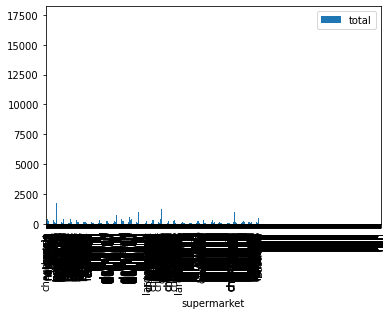

In [ ]:
import matplotlib.pyplot as plt
df_cleaned.plot.bar(x = 'supermarket', y = 'total')

In [ ]:
print("The most popular supermarket is: ")
#used this method since 'supermarket' column is a string
#To find out which supermarket has the most frequency
df_cleaned['supermarket'].value_counts(). idxmax()

The most popular supermarket is: 


'karrymart'

### **Do shoppers spend more on a weekday at a supermarket retail chain outside a mall?**


In [ ]:
#on weekdays
weekday = (df_cleaned['day_type'] == 'weekday')
#on weekends condition
weekend = (df_cleaned['day_type'] == 'weekend')

In [ ]:
#narrow down to mall data
mall = (df_cleaned['mall'] == 'yes')
#supermarkets not in malls
no_mall = (df_cleaned['mall'] == 'no')

In [ ]:
#finding the total sales for supermarkets in malls on weekdays
wd_sales = df_cleaned[weekday & mall]
wd_sales['total'].sum()

123331.70999999999

In [ ]:
#finding the total sales for supermarkets outside malls on weekdays

wkdy_sales = df_cleaned[weekday & no_mall]
wkdy_sales['total'].sum()

240746.9

In [ ]:
#finding the total sales for supermarkets in malls on weekends

wknd_sales = df_cleaned[weekend & mall]
wknd_sales['total'].sum()

7117.0

In [ ]:
#finding the total sales for supermarkets outside malls on weekends

wknd = df_cleaned[weekend & no_mall]
wknd['total'].sum()

85252.0

**Supermarkets that were outside malls made more sales on weekdays and weekends as well**

## **Did consumers prefer chain, medium or small stores?**


In [ ]:
#viewing the type of supermarkets and how often they appear
#counting the number of values in the type_market column
df_cleaned['type_market'].value_counts()


chain     1297
small      130
median      37
Name: type_market, dtype: int64

In [ ]:
#total sales for the chain supermarkets
types = df_cleaned.groupby('type_market')
chain = types.get_group('chain')
chain['total'].sum()

415972.61

In [ ]:
#total sales for the median supermarkets
median = types.get_group('median')
median['total'].sum()

13397.0

In [ ]:
#total sales for the small supermarkets
small = types.get_group('small')
small['total'].sum()

27078.0

##### **Customer prefered purchasing items from chain stores as compared to median and smaller stores**

###**Which was the most common mode of payment?**

In [ ]:
#counting the most common mode of payment 
df_cleaned['type'].value_counts()

cash               1378
mpesa                52
card                 26
credit card           3
voucher               2
redeemed points       2
points                1
Name: type, dtype: int64

####**Customers preferred paying for items using cash as compared to other payment methods**

###**Which category of items were less/more purchased in mid/high income areas?**

In [ ]:
#grouping by location category
area_type = df_cleaned.groupby('loc_category')
high = area_type.get_group('high')
consumables = (df_cleaned['consumables']=='yes')
#counting the number of times consumables were purchased in high income areas
high[consumables].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<bound method DataFrame.count of      supermarket  no_of_items  variation  ...  month    year         Date_Time
7     chandarana         32.0        3.0  ...    1.0  2017.0  03/01/2017 19:03
8       nakumatt          1.0        1.0  ...    3.0  2017.0  27/03/2017 19:34
69      nakumatt          1.0        1.0  ...    1.0  2017.0  24/01/2017 10:50
121     nakumatt          5.0        3.0  ...    6.0  2017.0  01/06/2017 17:36
122     nakumatt          2.0        2.0  ...    5.0  2017.0  21/05/2017 14:25
850   chandarana          2.0        2.0  ...    5.0  2017.0  17/05/2017 14:48
1282  chandarana          1.0        1.0  ...    5.0  2017.0  23/05/2017 14:12
1404    nakumatt          1.0        1.0  ...    5.0  2017.0  26/05/2017 11:02
1416    nakumatt          5.0        1.0  ...    8.0  2017.0  03/08/2017 20:18

[9 rows x 26 columns]>

In [ ]:
#counting the number of times consumables were purchased in mid income areas
mid = area_type.get_group('mid')
mid[consumables].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method DataFrame.count of      supermarket  no_of_items  variation  ...  month    year         Date_Time
5       nakumatt         22.0        3.0  ...   12.0  2016.0  24/12/2016 16:26
9         acacia          1.0        1.0  ...    5.0  2017.0  15/05/2017 14:06
10        tuskys         33.0        6.0  ...   12.0  2016.0  07/12/2016 08:56
12      nakumatt          3.0        1.0  ...    8.0  2016.0  20/08/2016 09:07
25        tuskys          4.0        1.0  ...    5.0  2017.0  22/05/2017 13:32
...          ...          ...        ...  ...    ...     ...               ...
1439   karrymart          1.0        1.0  ...    5.0  2023.0  23/05/2023 10:17
1449    nakumatt          2.0        2.0  ...    6.0  2017.0  18/06/2017 10:03
1457      tuskys          2.0        3.0  ...    6.0  2017.0  15/06/2017 19:26
1459      tuskys          4.0        3.0  ...    6.0  2017.0  15/06/2017 11:28
1462      tuskys          5.0        2.0  ...    5.0  2017.0  08/05/2017 11:00

[310 rows x 26 col


#####**Customers from mid income areas purchase more consumable goods as compared to those from high income areas**







In [ ]:
#counting the number of times assets were purchased in mid income areas
assets = (df_cleaned['asset']=='yes')
mid[assets].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method DataFrame.count of      supermarket  no_of_items  variation  ...  month    year         Date_Time
10        tuskys         33.0        6.0  ...   12.0  2016.0  07/12/2016 08:56
13        uchumi          5.0        2.0  ...   10.0  2016.0  20/10/2016 17:41
26        tuskys          9.0        3.0  ...    5.0  2017.0  22/05/2017 10:51
31        naivas         10.0        4.0  ...    5.0  2017.0  21/05/2017 14:21
49        tuskys          3.0        1.0  ...    5.0  2017.0  19/05/2017 12:06
...          ...          ...        ...  ...    ...     ...               ...
1411      tuskys         11.0        3.0  ...    6.0  2017.0  15/06/2017 20:46
1424      tuskys          1.0        1.0  ...    9.0  2017.0  18/09/2017 15:31
1425      ukwala         14.0        3.0  ...   11.0  2016.0  28/11/2016 19:26
1434   karrymart          1.0        1.0  ...    5.0  2018.0  23/05/2018 16:08
1447      tuskys          4.0        3.0  ...    6.0  2017.0  15/06/2017 20:24

[126 rows x 26 col

In [ ]:
#counting the number of times assets were purchased in high income areas
high[assets].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<bound method DataFrame.count of      supermarket  no_of_items  variation  ...  month    year         Date_Time
222     nakumatt          6.0        3.0  ...    6.0  2017.0  06/06/2017 10:45
243     nakumatt          1.0        1.0  ...    6.0  2017.0  07/06/2017 21:00
721     nakumatt          1.0        1.0  ...    6.0  2017.0  17/06/2017 09:56
756     nakumatt          1.0        1.0  ...    6.0  2017.0  16/06/2017 16:24
758     nakumatt          2.0        2.0  ...    6.0  2017.0    3/6/2017 09:03
764     nakumatt          1.0        2.0  ...    5.0  2017.0  31/05/2017 13:09
771     nakumatt          5.0        4.0  ...    6.0  2017.0  17/06/2017 17:08
854     nakumatt          3.0        3.0  ...    5.0  2017.0  29/05/2017 11:30
1275  chandarana          1.0        1.0  ...    5.0  2017.0  23/05/2017 20:49
1400    nakumatt          1.0        1.0  ...    6.0  2017.0  09/06/2017 17:48
1401    nakumatt          1.0        1.0  ...    6.0  2017.0  09/06/2017 17:48
1402    nakumatt   

#####**Customers from mid income areas purchase assets more as compared to high income areas**

In [ ]:
#counting the number of times fixed_assets were purchased in high income areas
fixed_asset = (df_cleaned['fixed_asset']=='yes')
high[fixed_asset].count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method DataFrame.count of     supermarket  no_of_items  variation  ...  month    year         Date_Time
222    nakumatt          6.0        3.0  ...    6.0  2017.0  06/06/2017 10:45

[1 rows x 26 columns]>

In [ ]:
#counting the number of times fixed_assets were purchased in mid income areas
mid[fixed_asset].count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<bound method DataFrame.count of     supermarket  no_of_items  variation  ...  month    year         Date_Time
101    nakumatt          6.0        3.0  ...    3.0  2017.0  10/03/2017 16:30
150      tuskys          2.0        1.0  ...    6.0  2017.0  02/06/2017 18:22

[2 rows x 26 columns]>

**Customers from Mid income areas purchased more fixed assets as compared to high income areas**

### **Did the chain stores that operated 24 hours have more sales?**

In [ ]:
#classify the stores by the time periods they operate
time = df_cleaned.groupby('24hr')
#chosingg those that operate for 24hrs
two4seven = time.get_group('yes')
#finding the sum of the sales column
two4seven['total'].sum()

37085.0

In [ ]:
#chosing those that don't operate for 24hrs
day_time = time.get_group('no')
#finding the sum of the sales column
day_time['total'].sum()

419362.61

#####**Stores that only operated during the day only had more sales compared to those that operated for 24hrs**

## **FINDINGS AND RECOMMENDATIONS**
1. Supermarkets that were outside malls made more sales on weekdays and weekends as well

**Recommendation**: Supermarkets in malls should do more to attract more customers

2. Customer prefered purchasing items from chain stores as compared to median and smaller stores

**Reccommendations**: Chain stores should set up more supermarkets to reach a larger market

3. Customers preferred paying for items using cash as compared to other payment methods

**Reccommendations**: Supermarkets should have more lose change to give customers to ensure easy transaction process

4. Customers from mid income areas purchase more consumable goods as compared to those from high income areas

**Reccommendations**: Supermarkets in mid income areas should stock more consumerable goods to satisfy all their consumers' needs

5. Customers from mid income areas purchase assets more as compared to high income areas

**Reccommendations**: Supermarkets in high income areas should stock more asset goods to satisfy all their consumers' needs

6. Customers from Mid income areas purchased more fixed assets as compared to high income areas

**Reccommendations**: Supermarkets in high income areas should stock more fixed asset goods to satisfy all their consumers' needs

7. Stores that only operated during the day only had more sales compared to those that operated for 24hrs

**Reccommendations**: Supermarkets should focus more on keeping the stores open and operational during the day because that is when most customers tend to buy goods.